In [1]:
workdir = "/SNS/users/lj7/dv/sns-chops/detcalib/SEQ"
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ


In [2]:
import sys, os, numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
sys.path.insert(0, "%s/lib"%workdir)

In [4]:
#sys.path

In [5]:
import get_I_tof
reload(get_I_tof)

<module 'get_I_tof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_I_tof.pyc'>

In [6]:
import get_difc_from_Itof
reload(get_difc_from_Itof)

<module 'get_difc_from_Itof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_difc_from_Itof.pyc'>

In [7]:
import align
reload(align)
import align_utils
reload(align_utils)

<module 'align_utils' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/align_utils.pyc'>

In [8]:
pack = 'C26T/eightpack-top'
packname, packtype = pack.split('/')

# C60

In [11]:
# np.load('Si-I_tof/I_tof-xbb.npy')

In [9]:
ls C60-I_tof/*{packname}*

C60-I_tof/I_tof-y-C26T.npy  C60-I_tof/pack-C26T.yaml


In [10]:
cat C60-I_tof/pack-{packname}.yaml

pixelIDs:
  first: 101376
  last: 102399


<IPython.core.display.Javascript object>


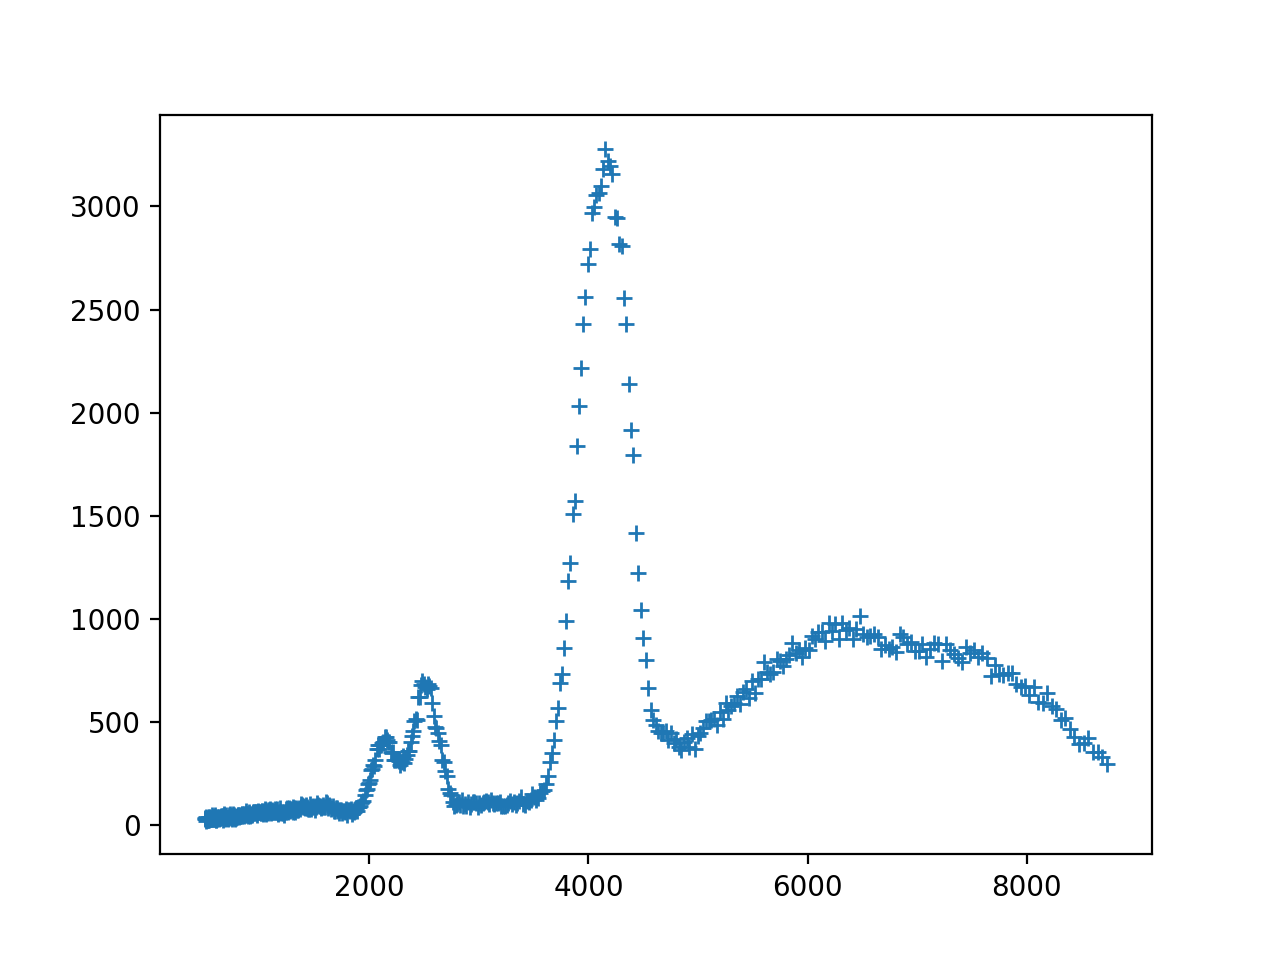

In [11]:
xbb = np.load('C60-I_tof/I_tof-xbb.npy')
x = (xbb[:-1] + xbb[1:])/2
ypack = np.load('C60-I_tof/I_tof-y-%s.npy' % packname)
plt.figure()
plt.plot(x, ypack[60], '+')

## Obtain difc

In [12]:
fitter = get_difc_from_Itof.Fitter(
    peak_fractional_width=0.05, bg_type='linear', curve_fit_options=dict(maxfev=1000), t0_range=(0, 100))
dvalues = [2.72509327, 2.89039789, 3.16627225, 3.24852679, 4.26940063, 5.00631601, 7.08,  8.17527981]
dmin=2.5; dmax=10

In [17]:
I_tof_dir = 'C60-I_tof'

gpd = get_difc_from_Itof.GetPackDifc(
    pack=packname,
    dvalues=dvalues,
    dmin=dmin, dmax=dmax,
    I_tof_dir = I_tof_dir,
    fitter=fitter,
    maxchisq = 100.,
    min_counts = 20000)

* tof range: 2083.33333333 8333.33333333


7.29880075439
501.512409235 506.563213853 7.98775495503e-10


<IPython.core.display.Javascript object>


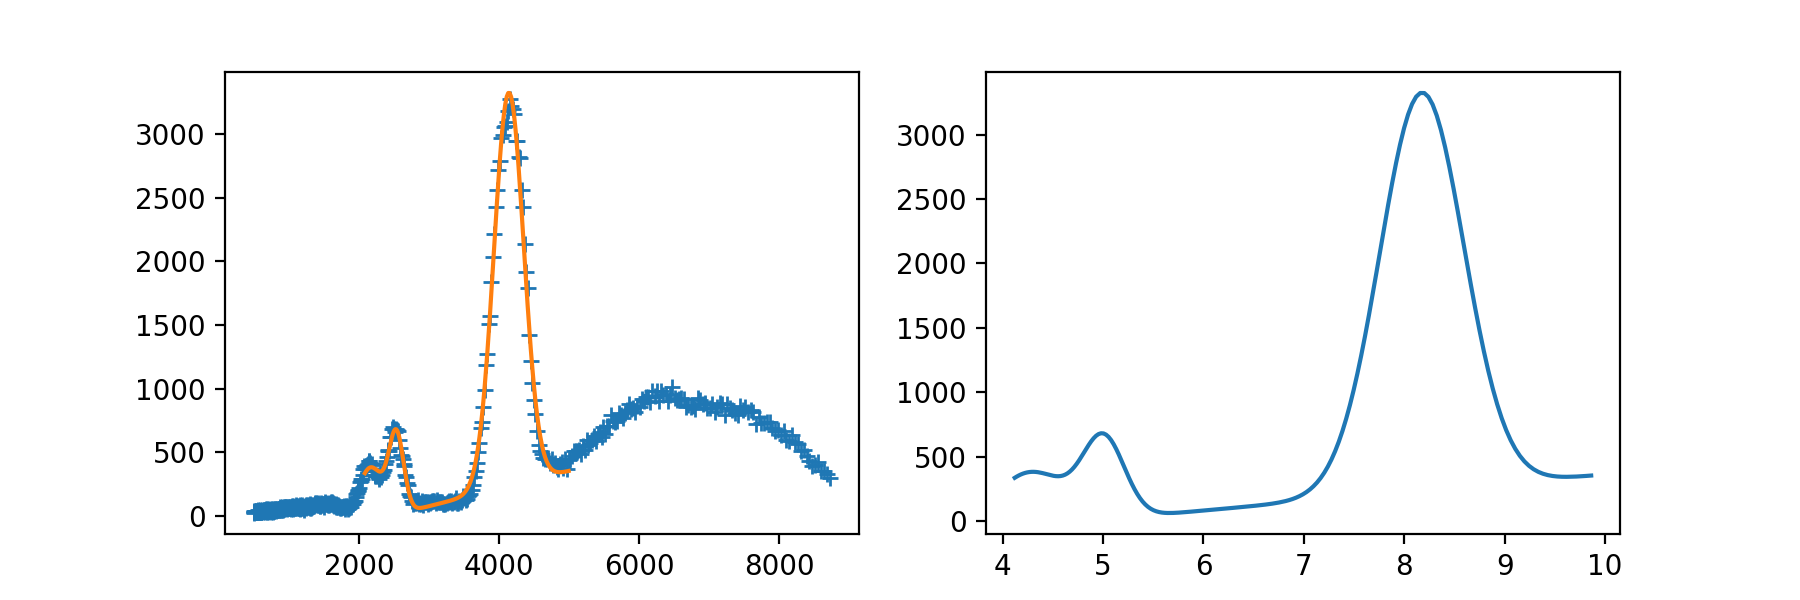

CPU times: user 304 ms, sys: 21.1 ms, total: 325 ms
Wall time: 302 ms


In [14]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(60)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

57.3461174014
599.655024257 617.644674984 100.0


<IPython.core.display.Javascript object>


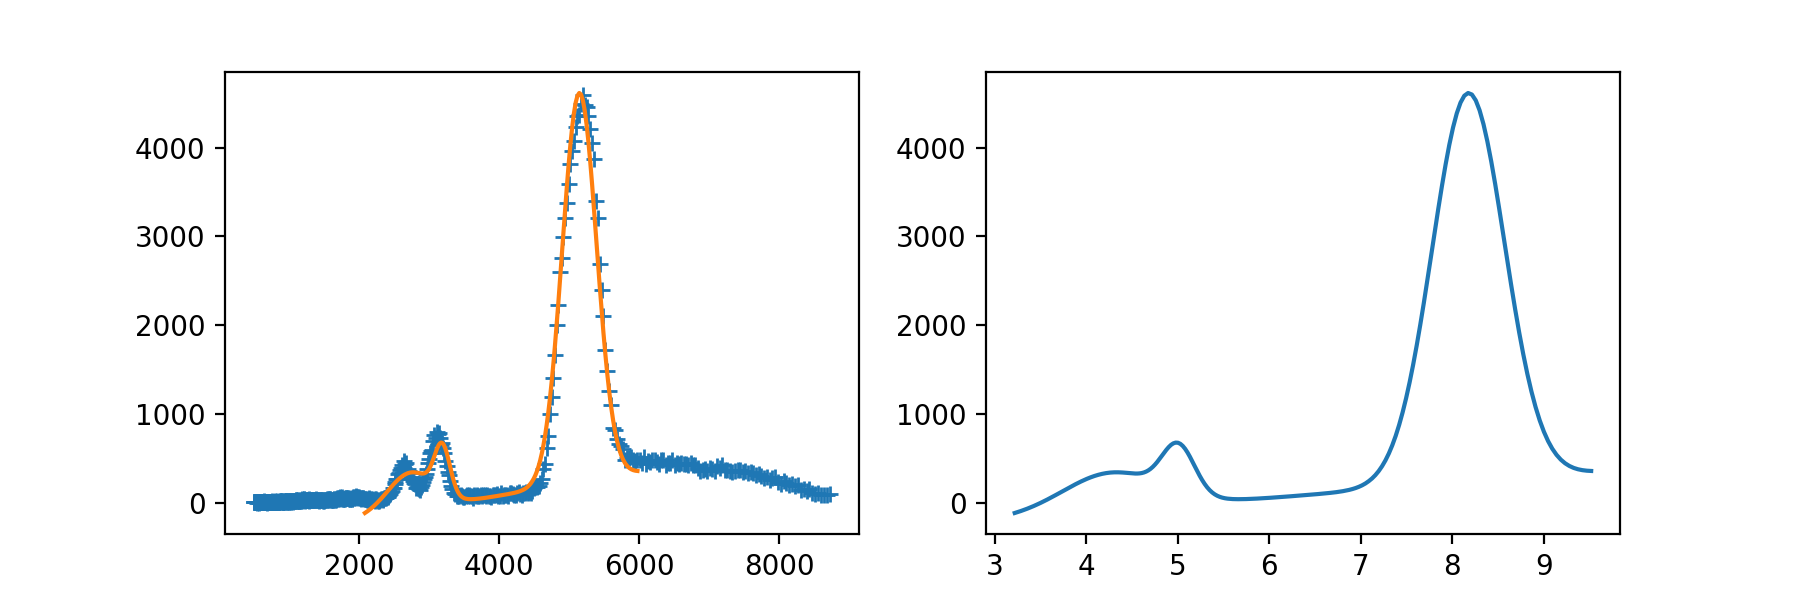

CPU times: user 309 ms, sys: 17.5 ms, total: 326 ms
Wall time: 311 ms


In [21]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(100+128)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

3.85644835658
438.124012898 451.267733285 21.4494570642


<IPython.core.display.Javascript object>


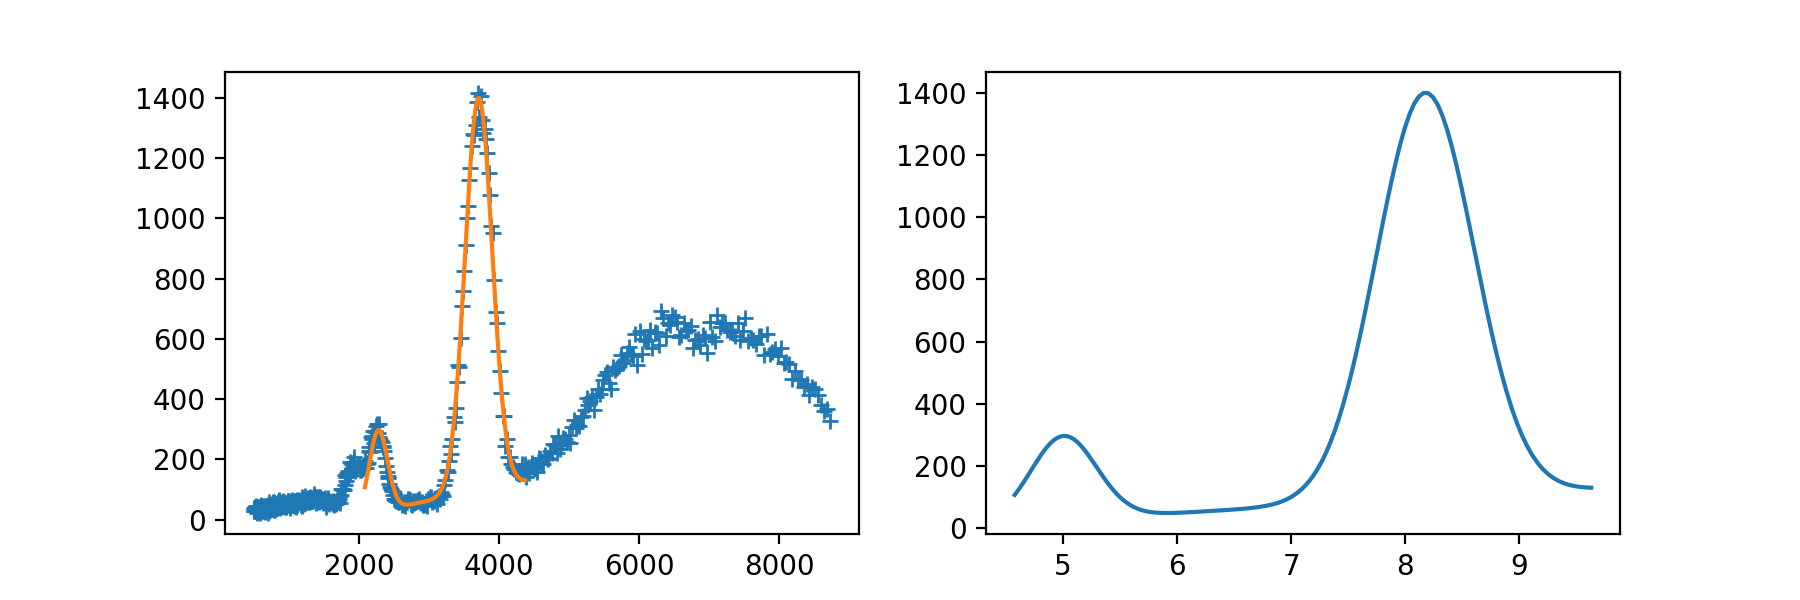

CPU times: user 291 ms, sys: 31.4 ms, total: 323 ms
Wall time: 296 ms


In [20]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(30+128)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

In [22]:
%%time
C60_difc, C60_mask = gpd()

- Working on pixel 0
.* Not enough counts: 0
* fit failed: pixel 0
.* Not enough counts: 1
* fit failed: pixel 1
.* Not enough counts: 2
* fit failed: pixel 2
.* Not enough counts: 3
* fit failed: pixel 3
.* Not enough counts: 4
* fit failed: pixel 4
.* Not enough counts: 5
* fit failed: pixel 5
.* Not enough counts: 6
* fit failed: pixel 6
.* Not enough counts: 7
* fit failed: pixel 7
.* Not enough counts: 8
* fit failed: pixel 8
.* Not enough counts: 9
* fit failed: pixel 9
.* Not enough counts: 10
* fit failed: pixel 10
.* Not enough counts: 11
* fit failed: pixel 11
.* Not enough counts: 12
* fit failed: pixel 12
.* Not enough counts: 13
* fit failed: pixel 13
.* Not enough counts: 14
* fit failed: pixel 14
.* Not enough counts: 15
* fit failed: pixel 15
.* Not enough counts: 16
* fit failed: pixel 16
.* Not enough counts: 17
* fit failed: pixel 17
.* Not enough counts: 18
* fit failed: pixel 18
.* Not enough counts: 19
* fit failed: pixel 19
.* Not enough counts: 20
* fit failed: 

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_difc_from_Itof.py:220: UserWarning:

Fitting failed: Traceback (most recent call last):
  File "/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_difc_from_Itof.py", line 215, in fit_pixel
    popt, pcov = sopt.curve_fit(ff, x, y, p0=p0, bounds=(lower, upper), **fitopts)
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 750, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + res.message)
RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.




* fit failed: pixel 49
.* fit failed: pixel 50
.* fit failed: pixel 51
....* fit failed: pixel 55
................* chisq too large: pixel 71, chisq 127.223603388
.* chisq too large: pixel 72, chisq 223.774374493
.* chisq too large: pixel 73, chisq 370.865472639
.* chisq too large: pixel 74, chisq 511.944515784
.* chisq too large: pixel 75, chisq 700.819142473
.* chisq too large: pixel 76, chisq 946.926505647
.* chisq too large: pixel 77, chisq 1287.12033793
.* chisq too large: pixel 78, chisq 1730.18539272
.* chisq too large: pixel 79, chisq 2143.76869
.* chisq too large: pixel 80, chisq 2681.46442467
.* chisq too large: pixel 81, chisq 3259.07545241
.* chisq too large: pixel 82, chisq 3817.1477257
.* chisq too large: pixel 83, chisq 4872.98779395
.* chisq too large: pixel 84, chisq 5183.94571954
.* chisq too large: pixel 85, chisq 5560.20603586
.* chisq too large: pixel 86, chisq 6038.22846743
.* chisq too large: pixel 87, chisq 6124.29506857
.* chisq too large: pixel 88, chisq 6538.

.* Not enough counts: 898
* fit failed: pixel 898
.* Not enough counts: 899
* fit failed: pixel 899
- Working on pixel 900
.* Not enough counts: 900
* fit failed: pixel 900
.* Not enough counts: 901
* fit failed: pixel 901
.* Not enough counts: 902
* fit failed: pixel 902
.* Not enough counts: 903
* fit failed: pixel 903
................................................................................................- Working on pixel 1000
.....................* Not enough counts: 1020
* fit failed: pixel 1020
.* Not enough counts: 1021
* fit failed: pixel 1021
.* Not enough counts: 1022
* fit failed: pixel 1022
.* Not enough counts: 1023
* fit failed: pixel 1023
CPU times: user 1min 20s, sys: 735 ms, total: 1min 21s
Wall time: 1min 20s


<IPython.core.display.Javascript object>


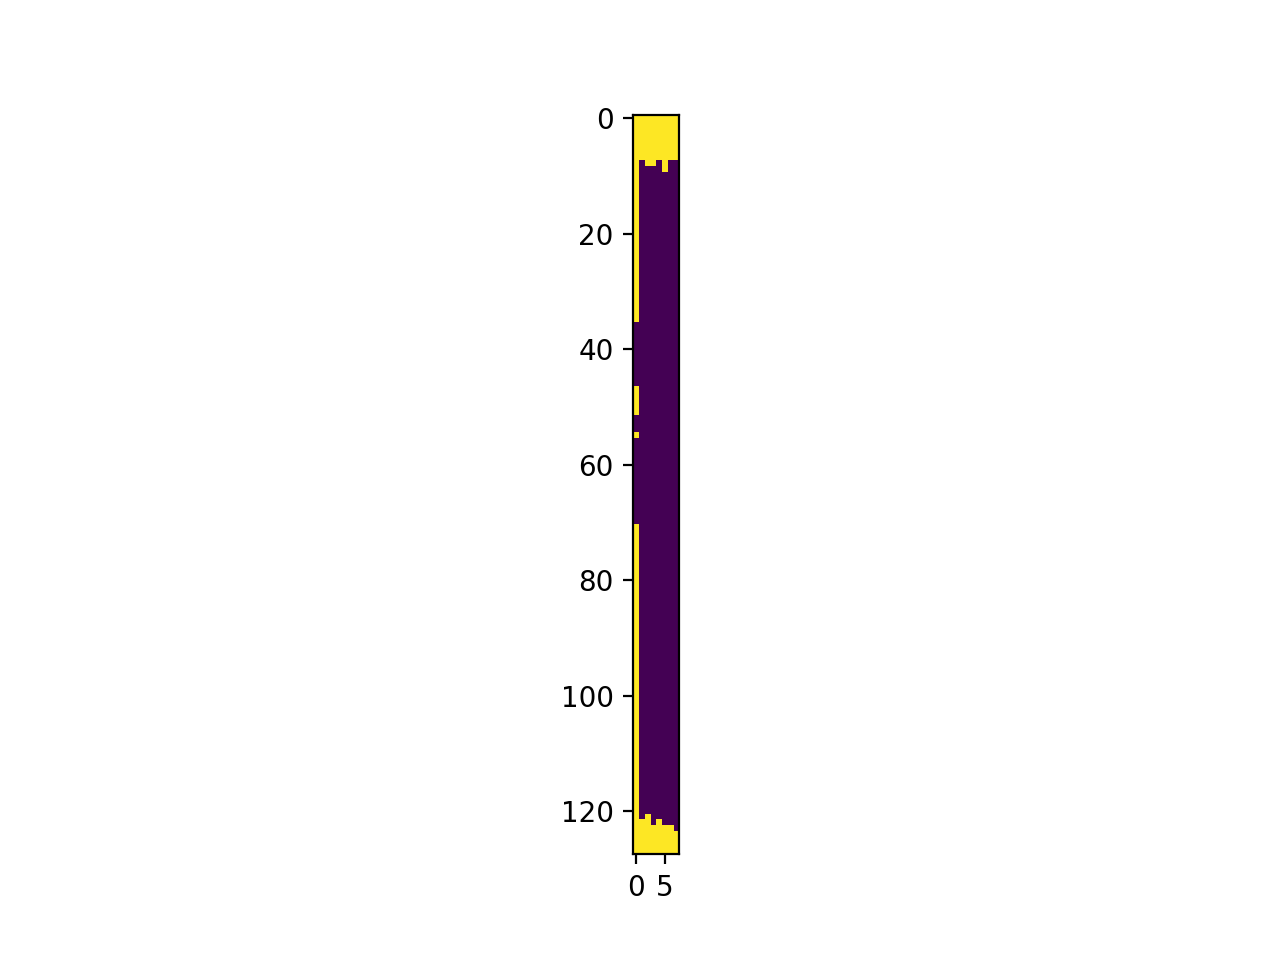

In [23]:
view = C60_mask.view()
view.shape = 8, 128
plt.figure()
plt.imshow(view.T)

In [24]:
np.save(os.path.join(I_tof_dir, 'difc-%s.npy' % packname), C60_difc)
np.save(os.path.join(I_tof_dir, 'mask-%s.npy' % packname), C60_mask)

In [25]:
I_tof_dir = 'C60-I_tof' 
!ls {I_tof_dir}/*-{packname}.npy

C60-I_tof/difc-C26T.npy  C60-I_tof/I_tof-y-C26T.npy  C60-I_tof/mask-C26T.npy


# Align

In [26]:
alignment = align.Align('./C60-I_tof')
alignment.options['Xposition'] = (-.02, .02)
alignment.options['Yposition'] = (-.02, .02)

In [27]:
alignment.load_L2_from_nxs('./L2table.nxs')

(array([-1.        , -1.        , -1.        , ...,  5.68382549,
         5.69823694,  5.67509985]),
 array([ True,  True,  True, ..., False, False, False], dtype=bool))

In [28]:
%%time
result = alignment.align(C60_difc, C60_mask, packname, ofile=open('new-%s.xml' % packname, 'wt'))

2017-12-04 22:31:15,684 - Align component - INFO - Working on init_IDF.xml/C row/C26T/eightpack-top. Starting position is [-0.1580523141568, 0.431673, 5.51024428302], Starting rotation is [179.50036244, 0.0, -0.0]


- Working on C26T
- pack params: [-0.1580523141568, 0.431673, 5.51024428302, 179.50036244, 0.0, -0.0]
* initial parameters:  [-0.1580523141568, 0.431673, 5.51024428302, 179.50036244, 0.0, -0.0]


2017-12-04 22:32:14,612 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C26T/eightpack-top. Final position is [-0.16648449096731313, 0.4419073960608574, 5.5042429296384325], Final rotation is [179.50034519229823, 0.0, -0.0]


- Estimate: (-0.19650720727255483, 0.431673, 5.5170908144553135)
- New: [-0.16648449096731313, 0.4419073960608574, 5.5042429296384325, 179.50034519229823, 0.0, -0.0]

  <type name="C26T">
    <component type="eightpack-top">
      <location x="-0.16648449" y="0.44190740" z="5.50424293">
         <rot axis-z="0" axis-x="0" axis-y="1" val="179.50034519"/>
      </location>
    </component>
  </type>

CPU times: user 1min, sys: 488 ms, total: 1min 1s
Wall time: 1min


In [133]:
new_params, fit = result

In [134]:
fit.options

OrderedDict([('Xposition', (-0.02, 0.02)),
             ('Yposition', (-0.02, 0.02)),
             ('Zposition', (-0.3, 0.3)),
             ('AlphaRotation', (-2.0, 2.0)),
             ('BetaRotation', False),
             ('GammaRotation', False)])

In [127]:
fit.cost([0.11326686170572708, 5.508410917878781, -179.42879915103185])

0.00022539444183761981

In [128]:
fit.cost([0.06600619612, 5.50764222828, -178.16963756000004])

0.000495214006710285